In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
# To explore seaborn's plotting functionality, we'll start by making a scatter chart of the tips data set. 
#We'll plot total bill amount against the tip amount.

# We will use the relplot function which we'll need to supply several keyword arguments to:

# data: a pandas dataframe that contains the data we want to plot
# x: the name of the column that will be the x value
# y: the name of the column that will be the y value

Text(10.049999999999997, 0.5, 'Tip ($)')

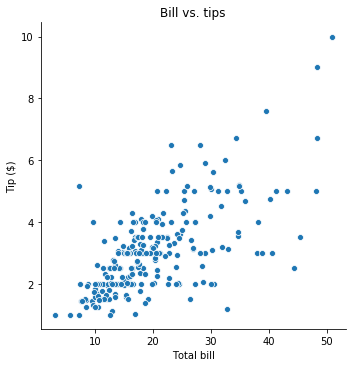

In [5]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips) # relplot = scatter plot
plt.title('Bill vs. tips')
plt.xlabel('Total bill')
plt.ylabel('Tip ($)')

In [ ]:
# One of the most useful features of seaborn is the ability to easily break down quantitative data by a qualitative 
# measure. For example, to create two separate charts that represent the two different times of day in our data set, 
# we can simply use the col keyword argument, and specify the name of the column:

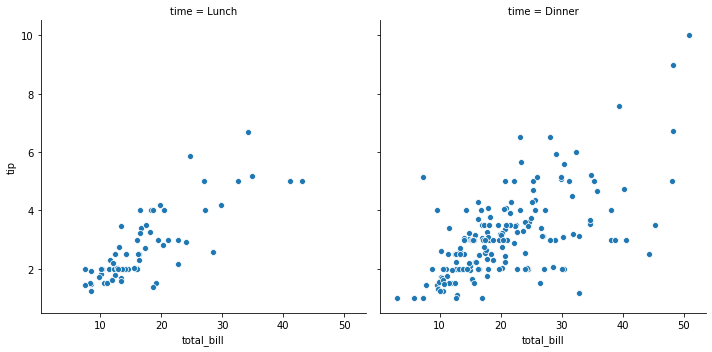

In [7]:
sns.relplot(x = 'total_bill', y = 'tip', col = 'time', data = tips)


In [ ]:
#Like the col keyword argument, we can use the hue keyword argument to separate the data points by color

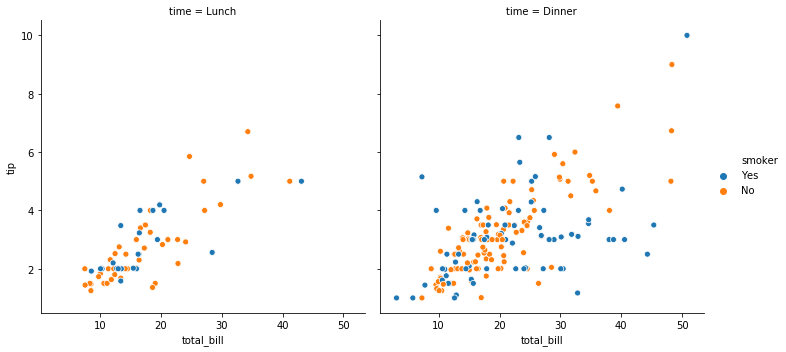

In [8]:
sns.relplot(x = 'total_bill', y = 'tip', col = 'time', hue = 'smoker', data = tips)

In [ ]:
#change the shape of the data points with the style keyword argument

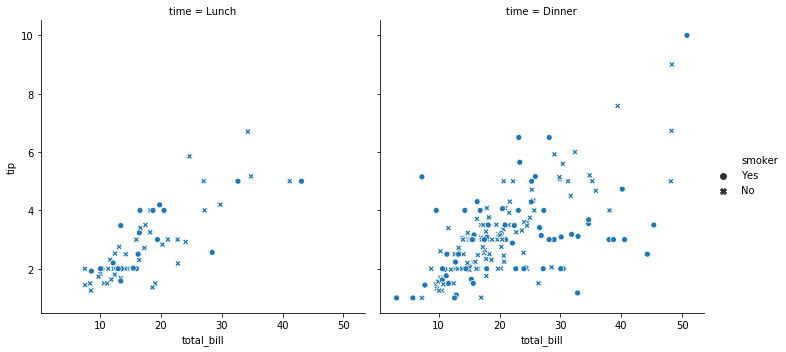

In [9]:
sns.relplot(x = 'total_bill', y = 'tip', col = 'time', style = 'smoker', data = tips)

In [ ]:
#Combine everything

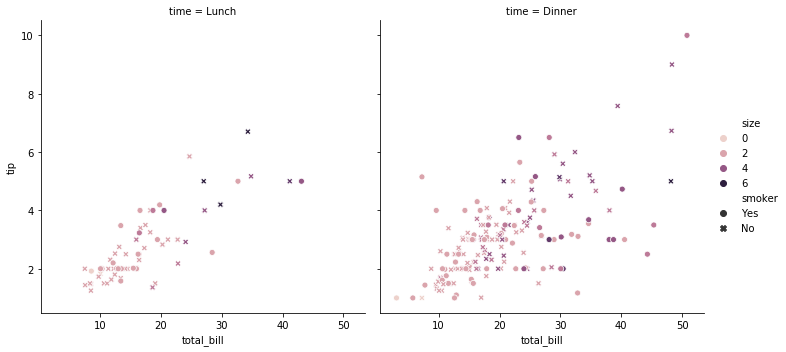

In [10]:
sns.relplot(x = 'total_bill', y = 'tip', col = 'time', hue = 'size', style = 'smoker', data = tips)

In [ ]:
#distplot is a function that can be used to check the distribution of a dataset.

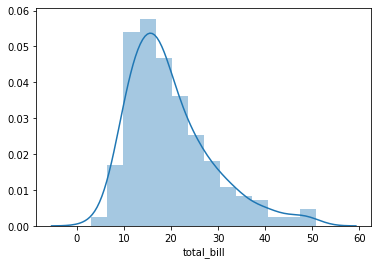

In [11]:
sns.distplot(tips.total_bill)

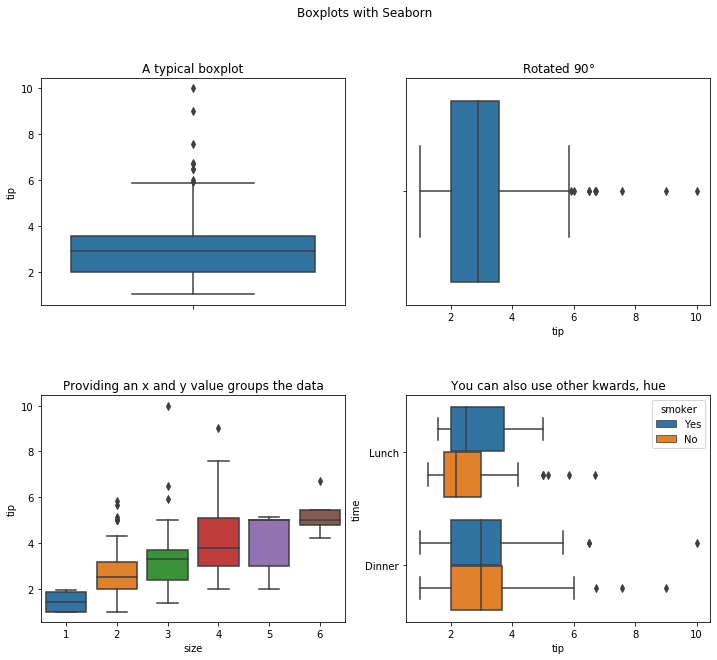

In [14]:
plt.figure(figsize = (12,10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data = tips, y = 'tip')
plt.title('A typical boxplot')

plt.subplot(222)
sns.boxplot (data = tips, x = 'tip')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data = tips, y ='tip', x = 'size')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data = tips, y = 'time', x = 'tip', hue = 'smoker')
plt.title('You can also use other kwards, hue')

plt.subplots_adjust(hspace = .4)

In [ ]:
#The heatmap function can be used to visualize tabular data

size,1,2,3,4,5,6
time,,,,,,
Lunch,2,52,5,5,1,3
Dinner,2,104,33,32,4,1


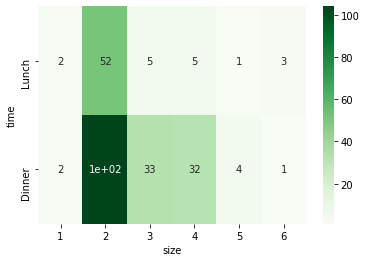

In [15]:
data = pd.crosstab(tips.time, tips['size'])
sns.heatmap(data, annot = True, cmap = plt.cm.Greens)
data

Text(0.5, 1.0, 'tip')

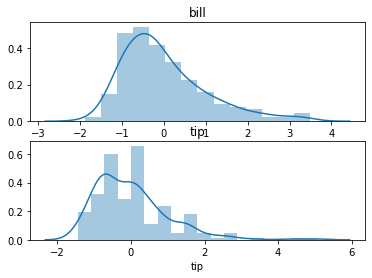

In [17]:
def scale(series):
    return (series - series.mean()) / series.std()   #Z score

df = pd.DataFrame({'bill' : scale(tips.total_bill), 
                  'tip' : scale(tips.tip)})

plt.subplot(211)
sns.distplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.distplot(df.tip)
plt.title('tip')


In [ ]:
# To get a very broad view of an entire data set, the pairplot function can be used. It will visualize the relationship 
# between every quantitative feature in a dataset.

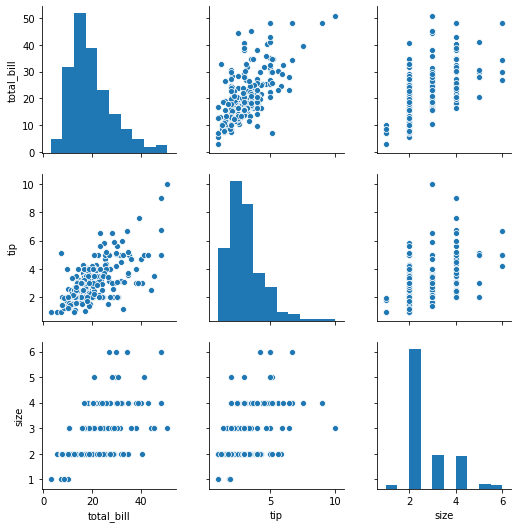

In [18]:
sns.pairplot(tips)

In [ ]:
#We can use jointplot to combine two visualizations:

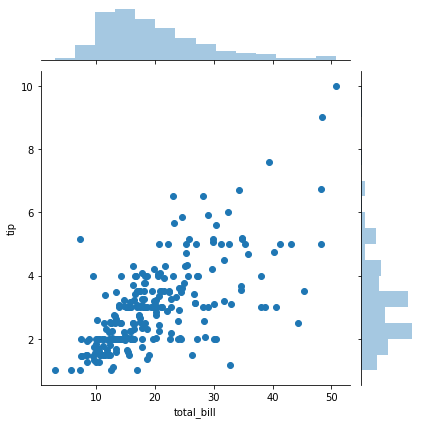

In [21]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip')

In [22]:
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

type(df)

pandas.core.frame.DataFrame

Text(3.799999999999997, 0.5, 'English grade')

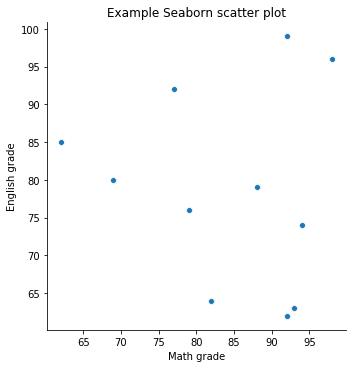

In [29]:
sns.relplot(data = df, x = 'math', y = 'english')
plt.title('Example Seaborn scatter plot')
plt.xlabel('Math grade')
plt.ylabel('English grade')

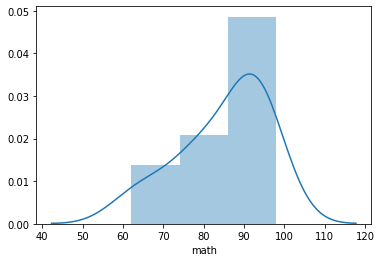

In [30]:
sns.distplot(df.math)

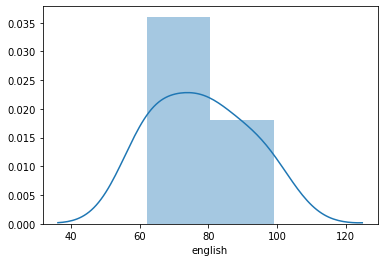

In [31]:
sns.distplot(df.english)

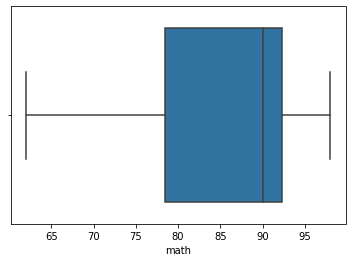

In [33]:
sns.boxplot(data = df, x = 'math')

Text(0.25, 90.0, '90.0')

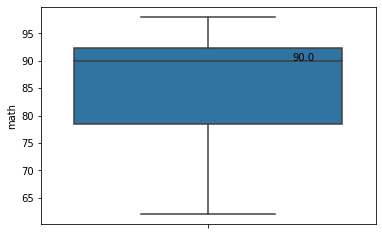

In [36]:
sns.boxplot(data = df, y = 'math')
plt.text(.25, df.math.median(), '{}'.format(df.math.median()))

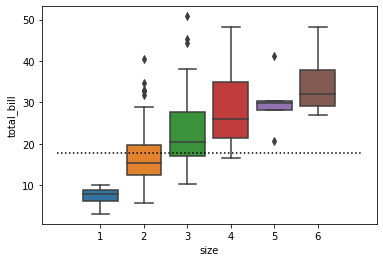

In [40]:
sns.boxplot(data = tips, y = 'total_bill', x = 'size')
plt.hlines(tips.total_bill.median(), -1, 6, ls = ':') #overall median line

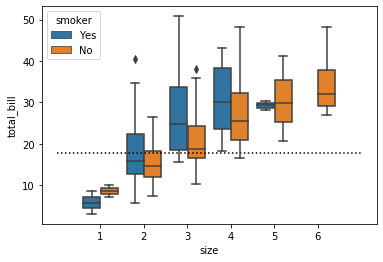

In [41]:
sns.boxplot(data = tips, y = 'total_bill', x = 'size', hue = 'smoker')
plt.hlines(tips.total_bill.median(), -1, 6, ls = ':')

In [43]:
df.corr()  #correlation coefficients

,math,english,reading
math,1.000000,-0.151234,-0.060959
english,-0.151234,1.000000,0.335586
reading,-0.060959,0.335586,1.000000


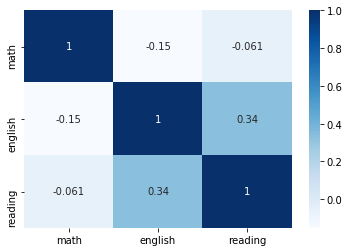

In [46]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues') #annot = annotations (the #s), cmap = color map

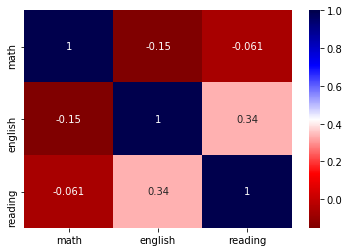

In [48]:
sns.heatmap(df.corr(), annot = True, cmap = 'seismic_r')

In [49]:
sns.heatmap? #info about function

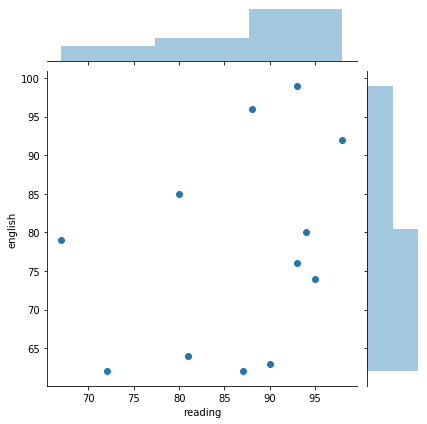

In [50]:
sns.jointplot(data = df, x = 'reading', y = 'english') #blue areas are the histogram of each variable

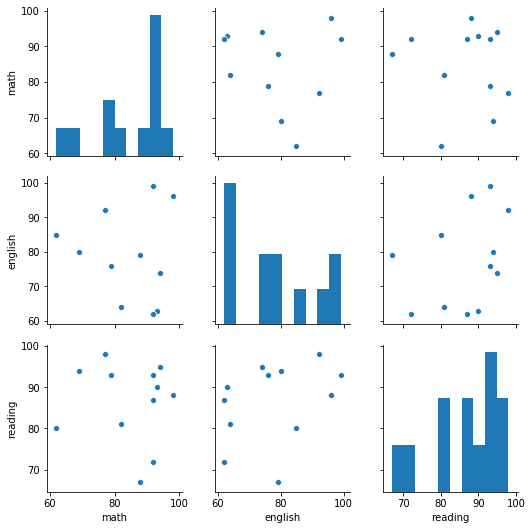

In [51]:
sns.pairplot(data = df) # scatter when variables are different, histogram if same vairable

In [53]:
tips.pivot_table('total_bill', 'size', ['smoker', 'time'], aggfunc = 'mean') #average bill for each combo, default is mean

smoker        Yes                    No           
time        Lunch     Dinner      Lunch     Dinner
size                                              
1        8.580000   3.070000  10.070000   7.250000
2       16.265556  18.589583  14.156765  16.062143
3       17.590000  30.312000  19.146667  21.252609
4       31.820000  30.340000  28.703333  27.647391
5             NaN  29.305000  41.190000  25.270000
6             NaN        NaN  30.383333  48.170000